In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
plt.style.use('ggplot')

# Table of contents

1. [ Dataset Background and Project Goal](#first-bullet)
2. [ Creating ER diagram for the datasets](#second-bullet)
3. [ Importing and cleaning data](#third-bullet)
4. [ EDA](#fourth-bullet)
5. [ Conclusion](#fifth-bullet)

# Background <a class="anchor" id="first-bullet"></a>

Bạn là một Data Analyst làm việc cho một công ty thương mại điện tử tên là X. Bạn được giao nhiệm vụ chuẩn bị một bài thuyết trình để trình bày tổng quan tình hình kinh doanh và vận hành của công ty tính đến thời điểm hiện tại cho Giám đốc bán hàng và Giám đốc vận hành. Bài thuyết trình tối thiểu phải bao gồm các thông tin sau: tổng quan tình hình kinh doanh, mức độ hài lòng của khách hàng, và đề xuất 2 đến 3 lĩnh vực (areas) mà công ty có thể cải thiện. 

Một số thông tin bổ sung cho case study:
Vì chỉ có dữ liệu đến năm 2018, nên ta sẽ giả sử hiện tại đang là tháng 9 năm 2018 (các dữ liệu sau tháng 9/2018 bạn có thể bỏ qua)
Công ty có trụ sở tại Mỹ, tuy nhiên được thành lập ở Brazil (đó là lý do vì sao một số thông tin được viết bằng tiếng Bồ Đào Nha)

# Creating ER diagram for the datasets <a class="anchor" id="second-bullet"></a>

#### After reading the document I managed to draw the ER diagram for the datasets

- The customers table is the dim table contains information about each customers. It connects to the orders table with an one-to-many relationship
- The orders table is the main (fact) table that we will be focusing on. It connects to three other tables with an one-to-many relationship: orders_reviews, order_payments and order_items
- The products table connects to the order_items table with a connection of one-to-many
- Finally, the product_category_name_translation is a weak-entity, it cannot exist without the products table. It connects to the products table.


<img src="ER_diagram.png">

# Importing and cleaning data <a class="anchor" id="third-bullet"></a>

In [2]:
orders = pd.read_csv('orders_dataset.csv')
order_items = pd.read_csv('order_items_dataset.csv')
order_payments = pd.read_csv('order_payments_dataset.csv')
products = pd.read_csv('products_dataset.csv')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv')
orders_reviews = pd.read_csv('order_reviews_dataset.csv')
customers = pd.read_csv('customers_dataset.csv')

In [3]:
## Function to convert column to datetime dtype
def datetime_convert(columns, df):
    df[columns] = \
    df[columns].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')

#### <font color = '#ffc453'>The customers table</font>

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### <font color = '#ffc453'>The orders table</font>

In [5]:
datetime_convert(\
    ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'],orders)

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [7]:
orders.customer_id.nunique() == orders.order_id.nunique()

True

Because customers and orders tables have a relationship of one-to-many. Means that one customers can have more than one orders. 
- The primary key of customers table is customer_id and have unique value counts of 99441
- The primary key of orders table is order_id and have unique value counts of 99441, the foreign key of order_id table is customer_id and have unique value counts of 99441.
<br>=> From this we can conclude that each customers appear in the datasets made exactly 1 order.

#### <font color = '#ffc453'> The orders_reviews table </font>

In [8]:
datetime_convert(['review_creation_date','review_answer_timestamp'],orders_reviews)

In [9]:
orders_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   review_id                100000 non-null  object        
 1   order_id                 100000 non-null  object        
 2   review_score             100000 non-null  int64         
 3   review_comment_title     11715 non-null   object        
 4   review_comment_message   41753 non-null   object        
 5   review_creation_date     100000 non-null  datetime64[ns]
 6   review_answer_timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [10]:
orders_reviews.order_id.nunique()

99441

- All orders appear in the orders_reviews table

#### <font color = '#ffc453'> The orders_items table </font>

In [11]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   seller_id      112650 non-null  object 
 4   price          112650 non-null  float64
 5   freight_value  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


In [12]:
order_items.order_id.nunique()

98666

=> Some orders does not appear in this table. Since this is an important table (we need to find the number of items sold and profits,... etc). We will only analyse the orders that appear in this table.

For example: order 1,2,3,4,5 appear in orders table
<br>Only order 1,2,3,4 appear in order_items table
=> Exclude order 5 from the analysis

You may ask why? Because if we don't this can lead to some faults in the analysis. For example some metrics such as Average Revenue Per Order will be wrong.
Still the same example as above, 4 orders appear in the order_items table generates a total revenue of 500.
- If we don't exlude the missing order => Average Revenue Per Order = 500/5 = 100 (this is wrong)
- In reality, the Average Revenue Per Order is only: 500/4 = 125. Don't have any informations regarding the revenue made by the order 5, so it's wrong if we conclude that it made only 0$.

#### <font color = '#ffc453'> The orders_payments table </font>

In [13]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [14]:
order_payments.order_id.nunique()

99440

=> Some orders does not appear in this table. Since this is an important table (we need to find payment value of each orders). We will only analyse the orders that appear in this table.

=> Let's filter the order_payments table, order_items table, order_reviews, orders table to only include order_id appear in both order_payments and order_items

In [15]:
# we'll use the inner join method to take the intersection between order_payments and order_items
order_payments = order_payments.merge(order_items, how='inner', on ='order_id')[order_payments.columns]
# since order_payments and order_items have different number of rows for the same order_id dimension => there'll be duplicated rows when we use this method. Since we can fetch
# all rows in the order_payments table by 2 columns (order_id, payment_sequential), we will drop duplicate on these 2 subsets to prevent duplicate rows.
order_payments.drop_duplicates(subset = ['order_id','payment_sequential'], inplace=True)

In [16]:
order_payments.order_id.nunique()

98665

In [17]:
# we'll use the inner join method to take the intersection between order_items and newly created order_payments table (then drop_duplicates on prime attributes)
order_items = order_items.merge(order_payments, how='inner', on = 'order_id')[order_items.columns].\
    drop_duplicates(subset = ['order_id','order_item_id'])

In [18]:
# we'll use the inner join method to take the intersection between orders_reviews and newly created order_payments table (then drop_duplicates on prime attributes)
orders_reviews = orders_reviews.merge(order_payments, how='inner', on = 'order_id')[orders_reviews.columns].\
    drop_duplicates(subset = ['review_id','order_id'])

In [19]:
# we'll use the inner join method to take the intersection between orders and newly created order_payments table (then drop_duplicates on prime attributes)
orders = orders.merge(order_payments, how='inner', on = 'order_id')[orders.columns].\
    drop_duplicates(subset = 'order_id')

In [20]:
orders.order_id.nunique() == order_items.order_id.nunique() == orders_reviews.order_id.nunique() == order_payments.order_id.nunique()

True

=> Great! Now all 4 tables have the same order_id

#### <font color = '#ffc453'> The products table </font>

In [21]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [22]:
products.product_category_name.nunique()

73

Keep all the rows in this table even if it contains null values. Too much rows to be ignored if we dropna. The only things we care about in this table is product_id and product_category_name. For data visualisation/analysis we will have NULL product_category_name as a seperate segment rather than ignoring it.

#### <font color = '#ffc453'> The product_category_name_translation table </font>

In [23]:
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [24]:
product_category_name_translation.product_category_name.nunique()

71

There are some product category names not appear in this table. For these categories we will keep the original category names.

In [25]:
### Try to set the new index to the product_category_name_translation table so that it contains all unique product category name from products table
new_index = products.product_category_name.unique()
product_category_name_translation = product_category_name_translation.\
    set_index('product_category_name').\
    reindex(new_index).reset_index()

In [26]:
### Keep the original category names for rows with NaN product_category_name_english
mask = product_category_name_translation.product_category_name_english.isnull()
product_category_name_translation.loc[mask,'product_category_name_english'] = \
product_category_name_translation.apply(lambda x: x['product_category_name'], axis = 1)

In [27]:
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          73 non-null     object
 1   product_category_name_english  73 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [28]:
## Customers is only recognised as a customer if they buy at least 1 order so we need to drop customers which does not appear in the newly cleaned orders table.
customers = customers.merge(orders, how='inner', on = 'customer_id')[customers.columns]

#### Exporting newly cleaned data for data visualisation

In [29]:
# orders.to_csv('orders2.csv')
# order_items.to_csv('order_items2.csv')
# order_payments.to_csv('order_payments2.csv')
# products.to_csv('products2.csv')
# product_category_name_translation.to_csv('product_category_name_translation2.csv')
# orders_reviews.to_csv('orders_reviews2.csv')
# customers.to_csv('customers2.csv')

# EDA <a class="anchor" id="fourth-bullet"></a>

#### Overview

- Business situation

In [30]:
rev = order_items['price'].sum()
print('total revenue made is {}'.format(rev))

total revenue made is 13591508.73


In [31]:
items = len(order_items)
print('total items sold is {}'.format(items))

total items sold is 112647


In [32]:
payments = order_payments['payment_value'].sum()
print('total payments made is {}'.format(payments))

total payments made is 15846280.169999998


- Customer satisfaction

In [33]:
avg_review_score = orders_reviews['review_score'].mean()
print('Average review score is {}'.format(avg_review_score))

Average review score is 4.089356083893531


In [34]:
avg_review_response_time = (orders_reviews['review_answer_timestamp'] - orders_reviews['review_creation_date']).mean()
print('Average review response time is {}'.format(avg_review_response_time))

Average review response time is 3 days 03:18:10.666149303


#### <font color = '#ffc453'> Orders </font>

In [35]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98665 entries, 0 to 103055
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98665 non-null  object        
 1   customer_id                    98665 non-null  object        
 2   order_status                   98665 non-null  object        
 3   order_purchase_timestamp       98665 non-null  datetime64[ns]
 4   order_approved_at              98651 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97656 non-null  datetime64[ns]
 6   order_delivered_customer_date  96475 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98665 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB


An order has to go through 4 steps before reaching the hand of the end-user:
- Order made
- Order approved
- Order delivered to carrier
- Order delivered to customer

In this part we will see:
1. which part occupies the largest amount of time?
2. How far is it from the order estimated delivery date to the actual order delivery date?
3. Orders arrived earlier than expected proportion
4. Does the time it takes to deliver an order affect the overall satisfaction of the customer with the order?
5. If yes, then what's the solution?


##### 1. Which part in the process occupies the largest amount of time?

In [36]:
made_to_approved = (orders['order_approved_at'] - orders['order_purchase_timestamp']).mean()
approved_to_carrier = (orders['order_delivered_carrier_date'] - orders['order_approved_at']).mean()
carrier_to_customer = (orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']).mean()

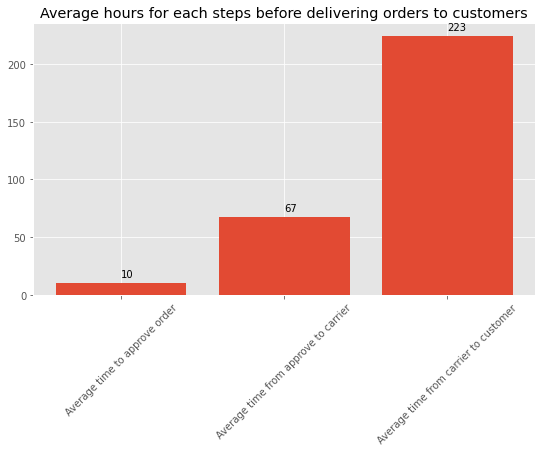

In [37]:
labels = ['Average time to approve order','Average time from approve to carrier','Average time from carrier to customer']
seconds = [i/pd.Timedelta(hours = 1) for i in [made_to_approved,approved_to_carrier,carrier_to_customer]]
f = plt.figure()
ax = f.add_subplot(1,1,1)
ax.bar(labels, seconds)
plt.xticks(rotation = 45)
plt.title('Average hours for each steps before delivering orders to customers')
for i,v in enumerate(seconds):
    plt.text(i,v + 5,str(int(v)))

In [38]:
print('It takes on average {} to approve an order\
    \nIt takes on average {} from approving an order to deliver it to carrier\
    \nIt takes on average {} from delivering the order to carrier to deliver it to customer'\
    .format(made_to_approved,approved_to_carrier,carrier_to_customer))

It takes on average 0 days 10:19:17.112000892 to approve an order    
It takes on average 2 days 19:18:05.257481411 from approving an order to deliver it to carrier    
It takes on average 9 days 07:56:06.170149470 from delivering the order to carrier to deliver it to customer


The last-mile delivery occupies a large amount of time (more than 9 days) compare to the 2 other steps. This issue should be taken into account by the company.

##### 2. How far is it from the order estimated delivery date to the actual order delivery date?

In [39]:
(orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']).describe()

count                         96475
mean     11 days 04:18:38.500596009
std      10 days 04:26:25.534541504
min             -189 days +00:35:53
25%                 6 days 09:21:47
50%                11 days 22:46:30
75%         16 days 05:51:55.500000
max               146 days 00:23:13
dtype: object

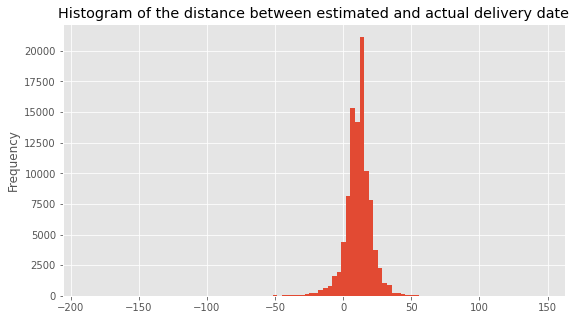

In [40]:
((orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date'])/np.timedelta64(1,'D')).plot.hist(bins = 100, \
    title = 'Histogram of the distance between estimated and actual delivery date');

##### 3. The proportion of orders arrived earlier than expected

In [41]:
earlier_or_not = orders.apply(lambda x: True if \
    x['order_estimated_delivery_date'] > x['order_delivered_customer_date'] else False, axis = 1).value_counts()

In [42]:
earlier_or_not

True     88649
False    10016
dtype: int64

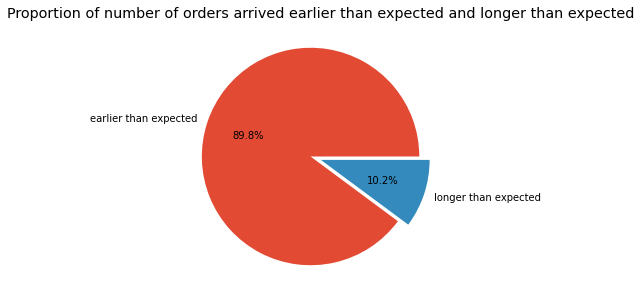

In [43]:
plt.pie(earlier_or_not, labels = ['earlier than expected','longer than expected'], autopct='%1.1f%%', explode = [0.1,0])
plt.title('Proportion of number of orders arrived earlier than expected and longer than expected');

##### 4. Does the time it takes to deliver an order affect the overall satisfaction of the customer with the order?

In [44]:
orders['earlier_or_not'] = orders.apply(lambda x: True if \
    x['order_estimated_delivery_date'] > x['order_delivered_customer_date'] else False, axis = 1)

In [45]:
avg_review_score_by_order_arrival_time = orders_reviews.merge(orders, how='inner', on = 'order_id').groupby('earlier_or_not')['review_score'].mean()
avg_review_score_by_order_arrival_time

earlier_or_not
False    2.376712
True     4.282892
Name: review_score, dtype: float64

''

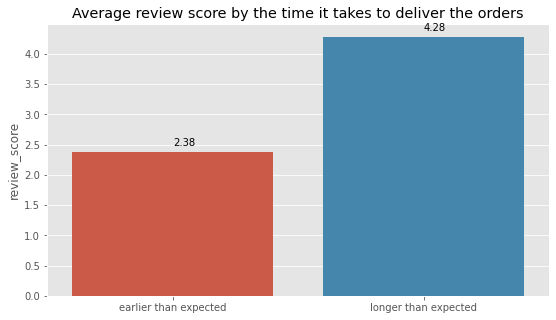

In [46]:
sns.barplot(['earlier than expected','longer than expected'], avg_review_score_by_order_arrival_time)
for i,v in enumerate(avg_review_score_by_order_arrival_time):
    plt.text(i,v + 0.1, str(round(v, 2)))
plt.title('Average review score by the time it takes to deliver the orders')
;

The answer is yes. The orders that arrived earlier than expected have an average review score of 4.3. While the orders that arrived longer than expected only have an average review score of 2.4.

##### 5. Solution for the late delivery

In [47]:
late_orders = orders[orders.earlier_or_not == False]

In [48]:
late_made_to_approved = (late_orders['order_approved_at'] - late_orders['order_purchase_timestamp']).mean()
late_approved_to_carrier = (late_orders['order_delivered_carrier_date'] - late_orders['order_approved_at']).mean()
late_carrier_to_customer = (late_orders['order_delivered_customer_date'] - late_orders['order_delivered_carrier_date']).mean()

In [49]:
print('For late orders:\
    \nIt takes on average {} to approve an order\
    \nIt takes on average {} from approving an order to deliver it to carrier\
    \nIt takes on average {} from delivering the order to carrier to deliver it to customer'\
    .format(late_made_to_approved,late_approved_to_carrier,late_carrier_to_customer))

For late orders:    
It takes on average 0 days 12:17:57.049920127 to approve an order    
It takes on average 5 days 01:02:06.852337071 from approving an order to deliver it to carrier    
It takes on average 25 days 16:27:47.426325878 from delivering the order to carrier to deliver it to customer


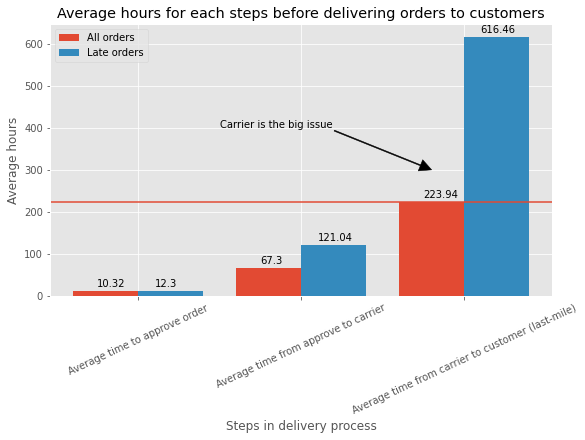

In [50]:
X = ['Average time to approve order','Average time from approve to carrier','Average time from carrier to customer (last-mile)']
seconds = [i/pd.Timedelta(hours = 1) for i in [made_to_approved,approved_to_carrier,carrier_to_customer]]
late_seconds = [i/pd.Timedelta(hours = 1) for i in [late_made_to_approved,late_approved_to_carrier,late_carrier_to_customer]]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, seconds, 0.4, label = 'All orders')
plt.bar(X_axis + 0.2, late_seconds, 0.4, label = 'Late orders')
  
plt.xticks(X_axis, X)
plt.xlabel("Steps in delivery process")
plt.ylabel("Average hours")
plt.title("Average hours for each steps before delivering orders to customers")
plt.xticks(rotation = 25)
plt.axhline(seconds[2])
for i,v in enumerate(seconds):
    plt.text(i - 0.25,v + 10,str(round(v,2)))
for i,v in enumerate(late_seconds):
    plt.text(i + 0.1,v + 10,str(round(v,2)))
plt.annotate('Carrier is the big issue',xytext = (0.5,400),
             arrowprops=dict(color = 'k', width=1),xy=(1.8,300))
plt.legend()
plt.show()

We can see that the biggest problem is the carrier not being able to deliver the orders on time. It takes 16 days (9 days) more than an usual order.
<br> => Solution: Have local warehouses. Since the company is shipping products across the country. It's impossible to have warehouses at all cities across the country. We need to identify warehouses at strategic locations.
<br> => Should really consider switching to another carrier

![Image of Yaktocat](https://thumbs.dreamstime.com/b/inside-store-warehouse-worker-walks-local-workshop-spanish-balearic-island-mallorca-63645898.jpg)

In [51]:
customer_city = customers[['customer_id','customer_city']]
order_count_by_city = orders.\
    merge(customer_city, how='inner', on = 'customer_id')\
        .groupby('customer_city')['earlier_or_not'].count().to_frame()

In [52]:
temp = orders.merge(customer_city, how='inner', on = 'customer_id')
late_rate_by_city = pd.crosstab(temp.customer_city,temp.earlier_or_not,normalize='index')[False]*100
late_rate_by_city = late_rate_by_city.to_frame()

In [53]:
order_and_late_rate_by_city = order_count_by_city.merge(late_rate_by_city, how='left', on ='customer_city')
order_and_late_rate_by_city.columns = ['order_count','late_rate']

In [54]:
order_and_late_rate_by_city.sort_values(['order_count','late_rate'],ascending = False).head(10)

,order_count,late_rate
customer_city,,
sao paulo,15402,8.427477
rio de janeiro,6834,14.779046
belo horizonte,2750,7.963636
brasilia,2116,9.073724
curitiba,1510,6.291391
campinas,1429,11.616515
porto alegre,1372,13.775510
salvador,1238,20.840065
guarulhos,1178,9.083192


=> Build local warehouses at sao paulo and rio de janeiro

#### <font color = '#ffc453'> Orders reviews</font>

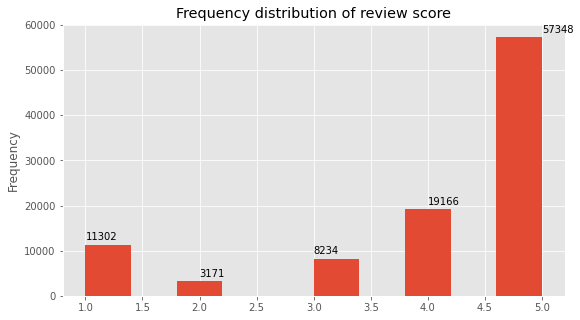

In [55]:
orders_reviews.review_score.plot.hist()
plt.title('Frequency distribution of review score')
for i,v in enumerate(orders_reviews['review_score'].value_counts().sort_index()):
    plt.text(i+1,v+1000,str(v))

##### Average response time for negative review

In [56]:
avg_reviews_response_time = \
    (orders_reviews['review_answer_timestamp'] - orders_reviews['review_creation_date']).mean()
print('It takes {} on average to response to a review'.format(avg_review_response_time))

It takes 3 days 03:18:10.666149303 on average to response to a review


Let's see how long it takes on average to response to a negative review

In [57]:
review_label = ['negative' if x < 3 else 'neutral and positive' for x in orders_reviews['review_score']]

In [58]:
orders_reviews.\
    groupby(review_label).\
        apply(lambda x: (x['review_answer_timestamp'] - x['review_creation_date']).mean())

negative               3 days 00:05:07.990603192
neutral and positive   3 days 03:51:08.719474205
dtype: timedelta64[ns]

3 days is too long. When customers are having a bad experiences whether if it's because of the quality of the product or because of the delivery time too long, the company should response to them as soon as possible. This should make them feel:
- That your company appreciates and values candid unsolicited feedback
- They're not being neglected and that your company actually care about them
- Avoid angry customers to spread negative informations about the business (by calming them down)

The same for neutral and positive reviews. 3 days is too long, for these reviews the company should set up bot to automatically answer them to show appreciation on their nice comments.

Set up bot for negative reviews to tell the customers that there will be an executive to reach back to them as soon as possible. This should reduce the reponse time.

![Image of Yaktocat](https://s3.amazonaws.com/blog4.0/blog/wp-content/uploads/NegativeFeedbackExamples_ContentImage_2-1024x510.png)

#### <font color = '#ffc453'> Items and categories</font>

In this section we'll try to answer these questions below:
1. Top 10 categories (in English) brought the most revenues?
2. Top 10 categories (in English) has the highest number of items sold?
3. Top 5 categories (in English) have the highest growth rate (compare to last year 2017)
4. Which categories (in English) are most often sold together? (For promotion purpose)

##### 1. Top 10 categories (in English) brought the most revenues?

In [59]:
categories_rev = order_items.merge(products[['product_id','product_category_name']], how = 'inner', on = 'product_id')\
    .merge(product_category_name_translation, how = 'inner', on = 'product_category_name')

In [60]:
top_categories_rev = categories_rev.groupby('product_category_name_english')['price'].sum().sort_values(ascending = False).head(10)

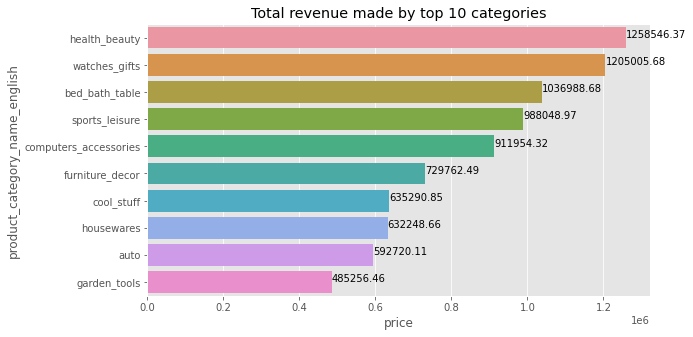

In [61]:
sns.barplot(top_categories_rev, top_categories_rev.index)
plt.title('Total revenue made by top 10 categories')
for i,v in enumerate(top_categories_rev):
    plt.text(v,i,str(v));

##### 2. Top 10 categories (in English) have the highest number of items sold?

In [62]:
categories_quan = categories_rev['product_category_name_english'].value_counts().head(10)

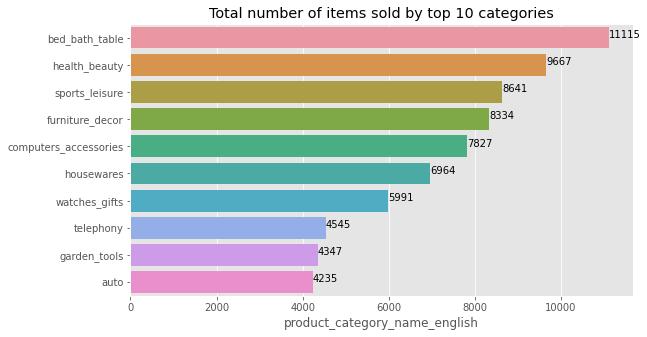

In [63]:
sns.barplot(categories_quan, categories_quan.index)
plt.title('Total number of items sold by top 10 categories')
for i,v in enumerate(categories_quan):
    plt.text(v,i,str(v));

##### 3. Top 5 categories (in English) have the highest growth rate (compare to last year 2017)

For simplicity we'll account the revenue made on the day the order is made by customers

In [64]:
categories_purchase_time = categories_rev.merge(orders[['order_id','order_approved_at']], how = 'inner', on = 'order_id')

We'll only care about the year 2017 and 2018 so let's filter anything else out.

In [65]:
mask1 = pd.to_datetime(categories_purchase_time['order_approved_at']).dt.year == 2017
mask2 = pd.to_datetime(categories_purchase_time['order_approved_at']).dt.year == 2018
categories_purchase_time = categories_purchase_time[mask1 | mask2]

In [66]:
performance_over_year = \
pd.pivot_table(data = categories_purchase_time, index = 'product_category_name_english', \
    columns = pd.to_datetime(categories_purchase_time['order_approved_at']).dt.year\
        , values = 'price', aggfunc = 'sum')
## Calculating the growth rate
performance_over_year['growth_rate'] = (performance_over_year[2018] - performance_over_year[2017])/performance_over_year[2017]*100

In [67]:
performance_over_year.sort_values('growth_rate', ascending = False)

order_approved_at,2017,2018,growth_rate
product_category_name_english,,,
small_appliances_home_oven_and_coffee,821.95,46623.76,5572.335300
diapers_and_hygiene,76.00,1356.69,1685.118421
arts_and_craftmanship,151.89,1662.12,994.291922
construction_tools_lights,4053.48,37026.52,813.450171
cine_photo,695.00,6238.46,797.620144
...,...,...,...
fashion_sport,1750.01,369.50,-78.885835
tablets_printing_image,6260.45,1267.96,-79.746504
cds_dvds_musicals,665.00,65.00,-90.225564


In [68]:
top_5_performance_over_year = performance_over_year.sort_values('growth_rate', ascending = False).head(5)

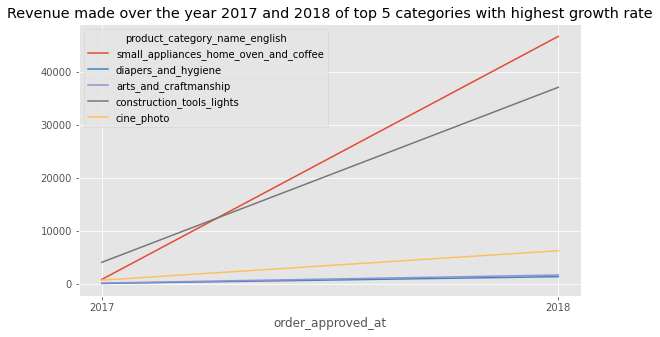

In [69]:
top_5_performance_over_year.drop(columns = 'growth_rate').transpose().plot()
plt.xticks([2017,2018])
plt.title('Revenue made over the year 2017 and 2018 of top 5 categories with highest growth rate');

=> Suggestion: Focus more on 2 categories:
- small_appliances_home_oven_and_cofffee
- construction_tools_flight
<br>Although construction_tools_flight only stand in number 4 but it brings success at large scale (more than 37000 revenue made in 2018), while the other 3 only success at relatively small scale

##### 4. Which categories (in English) are most often sold together? (For promotion purpose)

In [70]:
from itertools import combinations
from collections import Counter

In [71]:
sold_together = categories_rev.drop_duplicates(subset = ['order_id','product_category_name_english'])\
    .groupby('order_id')['product_category_name_english'].apply(lambda x: list(x)).to_frame()

In [72]:
count = Counter()

for sublist in sold_together['product_category_name_english']:
    count.update(Counter(combinations(sublist, 2)))

for key, value in count.most_common(10):
    print(key,value)

('furniture_decor', 'bed_bath_table') 70
('bed_bath_table', 'home_confort') 43
('furniture_decor', 'housewares') 24
('housewares', 'bed_bath_table') 20
('cool_stuff', 'baby') 20
('baby', 'toys') 19
('furniture_decor', 'garden_tools') 17
('bed_bath_table', 'baby') 17
('housewares', nan) 14
('health_beauty', 'sports_leisure') 14


We can see some pretty interesting findings here. People usually buy furniture decor together with bed & bad table. We can use these pieces of information to introduce some up-sell, cross-sell promotion in the next year. Some of the suggestions:
- For expensive products/categories: such as furniture or bed_bath_table, we can implement cart-value promotion. For example: if customers buy products from furniture_decor categories and it surpasses a cart-threshold (for example 1000$) they'll receive a 10% OFF on their next buy for products in bed_bath_table categories.
- For daily/cheap products, we can implement BOGO (Buy X Get Y) promotion. For example: Buy any 2 products from baby categories get a toy FOR FREE.

![Image of Yaktocat](https://i.ytimg.com/vi/Lb-6xQKL7UQ/maxresdefault.jpg)

#### <font color = '#ffc453'> Customers</font>

In this section we'll answer 2 questions:
- 1. Customer distribution by city
- 2. Top 10 customers who pay the most
- 3. Top customers with longest buying streak. Buying streak frequency distribution (by day). 
- 4. Which months of the year has the most buying streaks?

Note: the relationship between customer_unique_id and customer_id (the one we'll be using to join to the orders table) is 1-to-many
<br> A customer can have multiple customer_id, but only one customer_unique_id

##### 1. Customer distribution by city

In [73]:
customer_dis_by_city = \
customers.\
    drop_duplicates(subset = 'customer_unique_id').\
        groupby('customer_city')['customer_unique_id'].count().sort_values(ascending = False).reset_index()

customer_dis_by_city.rename(columns = {'customer_unique_id':'customer_counts'}, inplace = True)

In [74]:
customer_dis_by_city.\
    loc[customer_dis_by_city['customer_counts'] < customer_dis_by_city.customer_counts[4], 'customer_city'] = 'Others'

customer_dis_by_city = customer_dis_by_city.groupby('customer_city')['customer_counts'].sum().sort_values(ascending = False)

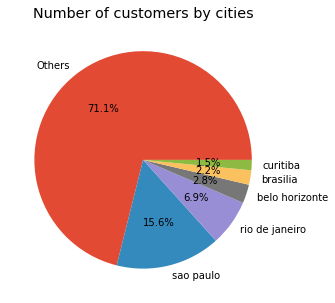

In [75]:
plt.pie(customer_dis_by_city, labels = customer_dis_by_city.index, autopct='%1.1f%%')
plt.title('Number of customers by cities');

##### 2. Top 10 customers who pay the most

In [76]:
rev_made_freq = order_items.merge(orders[['order_id','customer_id']], how = 'inner' , on = 'order_id')\
    .merge(customers[['customer_id','customer_unique_id']], how = 'inner', on = 'customer_id')

In [77]:
rev_made_freq = rev_made_freq.groupby('customer_unique_id')['price'].sum().sort_values(ascending = False)

In [78]:
top_rev_made_freq = rev_made_freq.head(10)

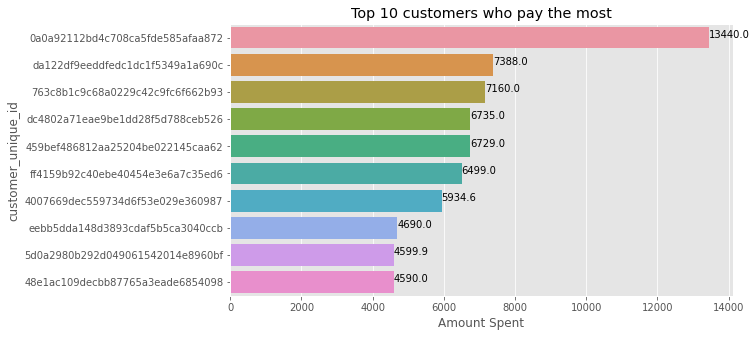

In [79]:
sns.barplot(top_rev_made_freq, top_rev_made_freq.index)
plt.xlabel('Amount Spent')
plt.title('Top 10 customers who pay the most')
for i,v in enumerate(top_rev_made_freq):
    plt.text(v,i,str(v));

In [80]:
rev_made_freq.describe()

count    95419.000000
mean       142.440276
std        217.657494
min          0.850000
25%         47.900000
50%         89.900000
75%        155.000000
max      13440.000000
Name: price, dtype: float64

##### 3. Customers with longest buying streak in 2018. Buying streak frequency distribution (by day)

In [81]:
df = orders[['customer_id','order_approved_at']].\
    merge(customers[['customer_id','customer_unique_id']], how = 'inner', on ='customer_id')
df = df[pd.to_datetime(df['order_approved_at']).dt.year == 2018]

In [82]:
df['order_approved_at'] = pd.to_datetime(df['order_approved_at']).dt.date
df['order_approved_at'] = df['order_approved_at'].astype('datetime64')
df['rank'] = df['order_approved_at'].rank(method='dense').astype('int')

In [83]:
df['group'] = pd.to_datetime(df['order_approved_at']).dt.month.astype('int')*pd.to_datetime(df['order_approved_at']).dt.day.astype('int')\
    - df['rank']

In [84]:
buying_streak = df.groupby(['customer_unique_id','group'])['order_approved_at'].agg(['min','max'])
buying_streak.rename(columns = {'min':'buying_streak_start_date','max':'buying_streak_end_date'}, inplace = True)

In this question I use a method called TABIBITOSAN to do sequence grouping. For more information kindly visit this article: https://community.oracle.com/tech/developers/discussion/1007478/tabibitosan-method-tutorial-by-aketi-jyuuzou

Buying streak distribution in the year 2018

In [85]:
buying_streak['streak_count'] = buying_streak['buying_streak_end_date'] - buying_streak['buying_streak_start_date'] + pd.Timedelta("1 days")

In [86]:
buying_streak['streak_count'].describe()

count                        53423
mean     1 days 00:17:55.491829361
std      0 days 23:51:23.115610871
min                1 days 00:00:00
25%                1 days 00:00:00
50%                1 days 00:00:00
75%                1 days 00:00:00
max              168 days 00:00:00
Name: streak_count, dtype: object

All buying streaks in the year 2018, sort by longest to shortest (doesn't count 1 day streak)

In [87]:
mask = buying_streak['buying_streak_end_date'] > buying_streak['buying_streak_start_date']
has_streak = buying_streak[mask]\
    .sort_values('streak_count', ascending = False)
has_streak.head(10)

,,buying_streak_start_date,buying_streak_end_date,streak_count
customer_unique_id,group,,,
91352e06066eef42b60b24049ccde4fd,-39,2018-03-10,2018-08-24,168 days
88c11a241bcbd239da19623bb23891a9,-33,2018-03-13,2018-07-24,134 days
ed917c786a8a3e411eae87aeca27cb27,-113,2018-05-01,2018-06-07,38 days
fd8ccc89be43894d2553494c71a61fd8,-33,2018-03-13,2018-04-19,38 days
ddeb6f3566dcf17cb455271ac103a73f,0,2018-01-02,2018-01-31,30 days
6f36e0165218ac7ae521d8e44739e703,0,2018-01-02,2018-01-26,25 days
2c3ed77b92cba1f5622b5ccaa1792b8b,0,2018-01-04,2018-01-27,24 days
827b19392982299876c0aca1f92208c2,0,2018-01-04,2018-01-24,21 days
527c6fbbe85cdf78ff1645e0a71e266f,0,2018-01-04,2018-01-23,20 days


Top 10 customers with highest buying streak

In [88]:
mask = has_streak.groupby('customer_unique_id')['streak_count'].transform('max') == has_streak['streak_count']
has_streak[mask].head(10)

,,buying_streak_start_date,buying_streak_end_date,streak_count
customer_unique_id,group,,,
91352e06066eef42b60b24049ccde4fd,-39,2018-03-10,2018-08-24,168 days
88c11a241bcbd239da19623bb23891a9,-33,2018-03-13,2018-07-24,134 days
ed917c786a8a3e411eae87aeca27cb27,-113,2018-05-01,2018-06-07,38 days
fd8ccc89be43894d2553494c71a61fd8,-33,2018-03-13,2018-04-19,38 days
ddeb6f3566dcf17cb455271ac103a73f,0,2018-01-02,2018-01-31,30 days
6f36e0165218ac7ae521d8e44739e703,0,2018-01-02,2018-01-26,25 days
2c3ed77b92cba1f5622b5ccaa1792b8b,0,2018-01-04,2018-01-27,24 days
827b19392982299876c0aca1f92208c2,0,2018-01-04,2018-01-24,21 days
527c6fbbe85cdf78ff1645e0a71e266f,0,2018-01-04,2018-01-23,20 days


##### 4. Which month of the year has the most buying streaks?

In [89]:
streak_by_month = pd.to_datetime(has_streak['buying_streak_start_date']).dt.month.value_counts()
streak_by_month

1    30
3     3
5     1
Name: buying_streak_start_date, dtype: int64

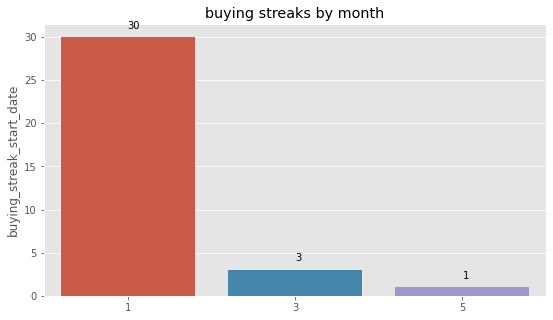

In [90]:
sns.barplot(streak_by_month.index,streak_by_month)
for i,v in enumerate(streak_by_month):
    plt.text(i,v + 1,str(v))
plt.title('buying streaks by month');

We can see that most of the buying streaks start in January.

=> Suggestion: apply loyalty program in January to encourage even more customers to purchase repeatedly. Loyalty programs come in many forms, ranging from simple stamp cards to sophisticated, point-based reward systems.

![Image of Yaktocat](https://cdn.shortpixel.ai/spai/q_glossy+w_961+to_auto+ret_img/https://www.webhostingsecretrevealed.net/wp-content/uploads/loyalty-program.png)

#### <font color = '#ffc453'> Order payments</font>

In this section, we'll answer these questions below:
- 1. What's the preferrable method of payment?
- 2. One time payment and installment payment proportion?
- 3. How many orders haven't been fully paid yet?

##### 1. What's the preferrable method of payment?

In [91]:
payments = order_payments['payment_type'].value_counts()

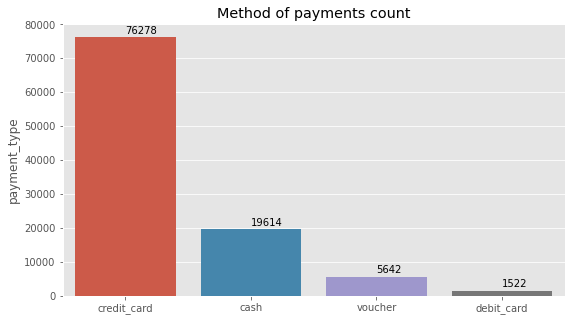

In [92]:
sns.barplot(payments.index, payments)
plt.title('Method of payments count')
for i,v in enumerate(payments):
    plt.text(i,v + 1000,str(v));

##### 2. One time payment and installment payment proportion

In [173]:
installment_proportion = orders.merge(order_payments[['order_id','payment_installments']], how = 'inner', on ='order_id')

In [176]:
installment_proportion['type_of_payment'] = \
    ['one time payment' if x == 1 else 'installments payment' for x in installment_proportion['payment_installments']]

In [179]:
installment_proportion = installment_proportion['type_of_payment'].value_counts()

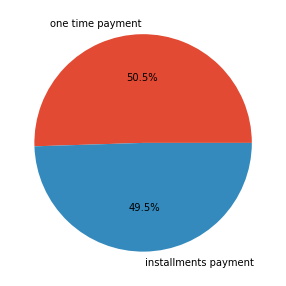

In [181]:
plt.pie(installment_proportion, labels = installment_proportion.index, autopct = '%1.1f%%');

##### 3. How many orders haven't been fully paid yet?

In [164]:
payment_made_by_order = order_payments.groupby('order_id')['payment_value'].sum().reset_index()

In [165]:
order_items['revenue'] = order_items['price'] + order_items['freight_value']
revenue_by_order = order_items.groupby('order_id')['revenue'].sum().reset_index()

In [166]:
## Due to some unexpected behavior of Python when performing subtraction of float, we'll need to create a diff column and perform floor on it
revenue_and_payment_comparision = revenue_by_order.merge(payment_made_by_order, how = 'inner', on ='order_id')
revenue_and_payment_comparision['diff'] = revenue_and_payment_comparision['revenue'] - revenue_and_payment_comparision['payment_value']
revenue_and_payment_comparision['diff'] = revenue_and_payment_comparision['diff'].apply(np.floor)

In [167]:
revenue_and_payment_comparision['classify'] = \
    ['fully paid' if x <= 0 else 'not fully paid' for x in revenue_and_payment_comparision['diff']]

In [168]:
revenue_and_payment_comparision['classify'].value_counts()

fully paid        98647
not fully paid       18
Name: classify, dtype: int64

In [169]:
revenue_and_payment_comparision.query('classify == "not fully paid"')

,order_id,revenue,payment_value,diff,classify
1972,051fcda88d997d3ff86012da2a556342,56.60,51.70,4.0,not fully paid
5533,0e556f5eafbf3eb399290101b183b10e,95.66,81.90,13.0,not fully paid
14628,262118ce178bb3e4590a3adcf6d62e6b,177.74,126.12,51.0,not fully paid
19196,320dcf288de15e4ff06ebbfce4e42c78,87.55,81.37,6.0,not fully paid
25102,4154bf1348caac78152fe76e3e9c4af8,165.26,150.27,14.0,not fully paid
25960,4387477eec4b3c89b39f3f454940d059,231.92,222.02,9.0,not fully paid
41989,6cff0c3dacf64bb7cb2ad584b81b7d0d,33.43,30.83,2.0,not fully paid
42292,6dcf0aeb8b1eb4021c26e1d0e9394979,333.92,318.97,14.0,not fully paid
42504,6e57e23ecac1ae881286657694444267,350.41,333.91,16.0,not fully paid
43011,6fa0c125ee7d870f6602c97e33d87bc5,47.31,45.71,1.0,not fully paid


Only 18/98665 orders are not fully paid.

# Conclusion <a class="anchor" id="fifth-bullet"></a>

Some suggestions for the business:
- The company should really consider switching to another carrier & service provider
- Should have local warehouses on strategic locations:sao paulo and rio dejaneiro
- Reduce the time to response to negative reviews. Set up bot to automatically answer to negative reviews
- Focus on categories with high growth-rate: small_appliances_home_oven_and_cofffee and constrution_tools_flight
- Apply up-sell, cross-sell with products from categories that are frequently bought together (furniture_decore and bed_bath_table):
    + For expensive products/categories: such as furniture or bed_bath_table, we can implement cart-value promotion. For example: if customers buy products from furniture_decor categories and it surpasses a cart-threshold (for example 1000$) they'll receive a 10% OFF on their next buy for products in bed_bath_table categories.
    + For daily/cheap products, we can implement BOGO (Buy X Get Y) promotion. For example: Buy any 2 products from baby categories get a toy FOR FREE.
- Apply loyalty program in January to encourage even more customers to purchase repeatedly. Loyalty programs come in many forms, ranging from simple stamp cards to sophisticated, point-based reward systems.